Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import scipy.stats
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Diabetes health indicator dataset.csv")
data.head()

,Diabetes,HighBP,HighChol,BMI,BMI Category,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Count of Individual
0,No Diabetes,Yes,Yes,40,5,Yes,No,No,No,No,...,No,Poor,18,15,Yes,Female,60-64,High School Graduate (Grade 12 or GED),"<25,000",1
1,No Diabetes,No,No,25,3,Yes,No,No,Yes,No,...,Yes,Poor,0,0,No,Female,50-54,College (1-3 yrs) Graduate,"<10,000",2
2,No Diabetes,Yes,Yes,28,3,No,No,No,No,Yes,...,Yes,Poor,30,30,Yes,Female,60-64,High School Graduate (Grade 12 or GED),">=75,000",3
3,No Diabetes,Yes,No,27,3,No,No,No,Yes,Yes,...,No,Very Good,0,0,No,Female,70-74,Some High School (Grades 9-11),"<52,500",4
4,No Diabetes,Yes,Yes,24,2,No,No,No,Yes,Yes,...,No,Very Good,3,0,No,Female,70-74,Some College (1-3 yrs) or Technical School,"<32,500",5


In [ ]:
def calculate_midpoint(row):
    if '-' in row['Age']:
        start, end = map(int, row['Age'].split('-'))
        midpoint = (start + end) / 2
    elif '>=' in row['Age']:
        start = int(row['Age'].replace('>=', ''))
        midpoint = start  # You can adjust this logic based on your requirements
    else:
        # Handle other cases as needed
        midpoint = None

    return midpoint
data['midpoint'] = data.apply(calculate_midpoint, axis=1)
print(data[['Age', 'midpoint']])

          Age  midpoint
0       60-64      62.0
1       50-54      52.0
2       60-64      62.0
3       70-74      72.0
4       70-74      72.0
...       ...       ...
253675  40-44      42.0
253676  70-74      72.0
253677  25-29      27.0
253678  50-54      52.0
253679  60-64      62.0

[253680 rows x 2 columns]


In [ ]:
print(data['BMI'].corr(data['midpoint']))

-0.033435802846677624


In [ ]:
df = pd.DataFrame(data)
corr_matrix = df.corr()
print(corr_matrix)

                          BMI  BMI Category  MentHlth  PhysHlth  \
BMI                  1.000000      0.874870  0.085310  0.121141   
BMI Category         0.874870      1.000000  0.071200  0.103686   
MentHlth             0.085310      0.071200  1.000000  0.353619   
PhysHlth             0.121141      0.103686  0.353619  1.000000   
Count of Individual  0.002872      0.012882  0.003844  0.004902   
midpoint            -0.033436     -0.013634 -0.091568  0.099249   

                     Count of Individual  midpoint  
BMI                             0.002872 -0.033436  
BMI Category                    0.012882 -0.013634  
MentHlth                        0.003844 -0.091568  
PhysHlth                        0.004902  0.099249  
Count of Individual             1.000000 -0.015483  
midpoint                       -0.015483  1.000000  


<ipython-input-6-aebf1cffd7c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
print(data.BMI.min(), data.BMI.max())

12 98


In [ ]:
label_encoder = LabelEncoder()
data['sex_numeric'] = label_encoder.fit_transform(data['Sex'])
data['sex_numeric'] = data['sex_numeric'].map({0: 1, 1: 0})
#print(data)

In [ ]:
print(data['BMI'].corr(data['sex_numeric']))

-0.04295030326910359


(array([1.34220e+04, 1.52407e+05, 6.78060e+04, 1.59760e+04, 2.71200e+03,
        6.64000e+02, 1.72000e+02, 2.42000e+02, 2.25000e+02, 5.40000e+01]),
 array([12. , 20.6, 29.2, 37.8, 46.4, 55. , 63.6, 72.2, 80.8, 89.4, 98. ]),
 <BarContainer object of 10 artists>)

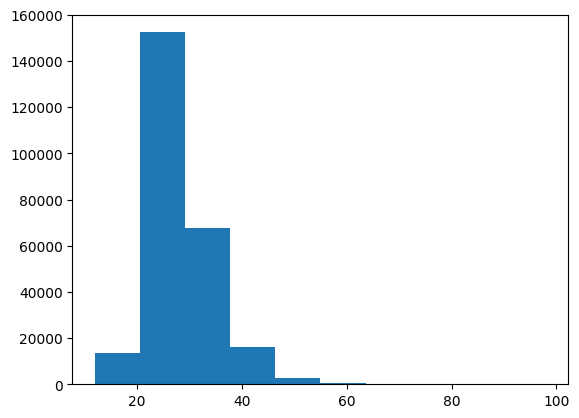

In [ ]:
plt.hist(data=data, x='BMI')

(array([111706.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 141974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

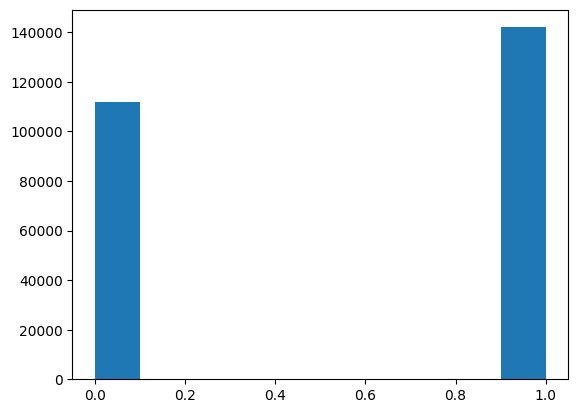

In [ ]:
plt.hist(data=data, x='sex_numeric')

(array([ 5700., 18721., 13823., 16157., 19819., 26314., 64076., 32194.,
        23533., 33343.]),
 array([21. , 26.9, 32.8, 38.7, 44.6, 50.5, 56.4, 62.3, 68.2, 74.1, 80. ]),
 <BarContainer object of 10 artists>)

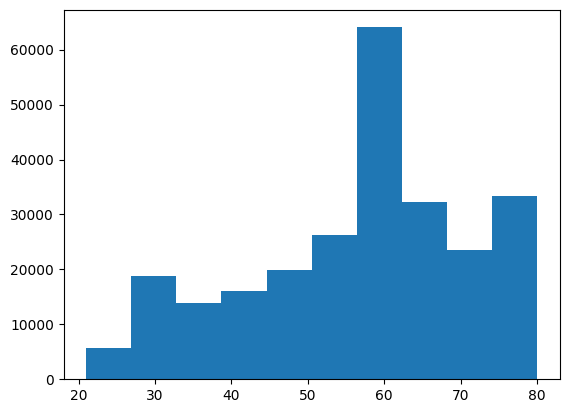

In [ ]:
plt.hist(data=data, x='midpoint')

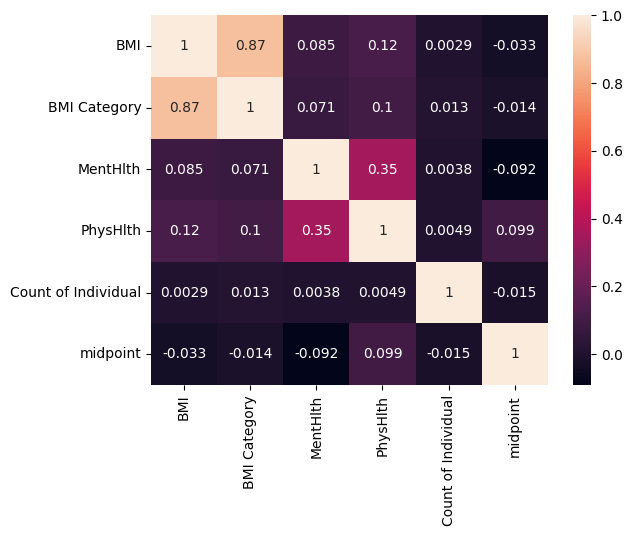

In [ ]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
confusionmatrix = pd.crosstab(data['BMI'], data['midpoint'])
#print (confusionmatrix)

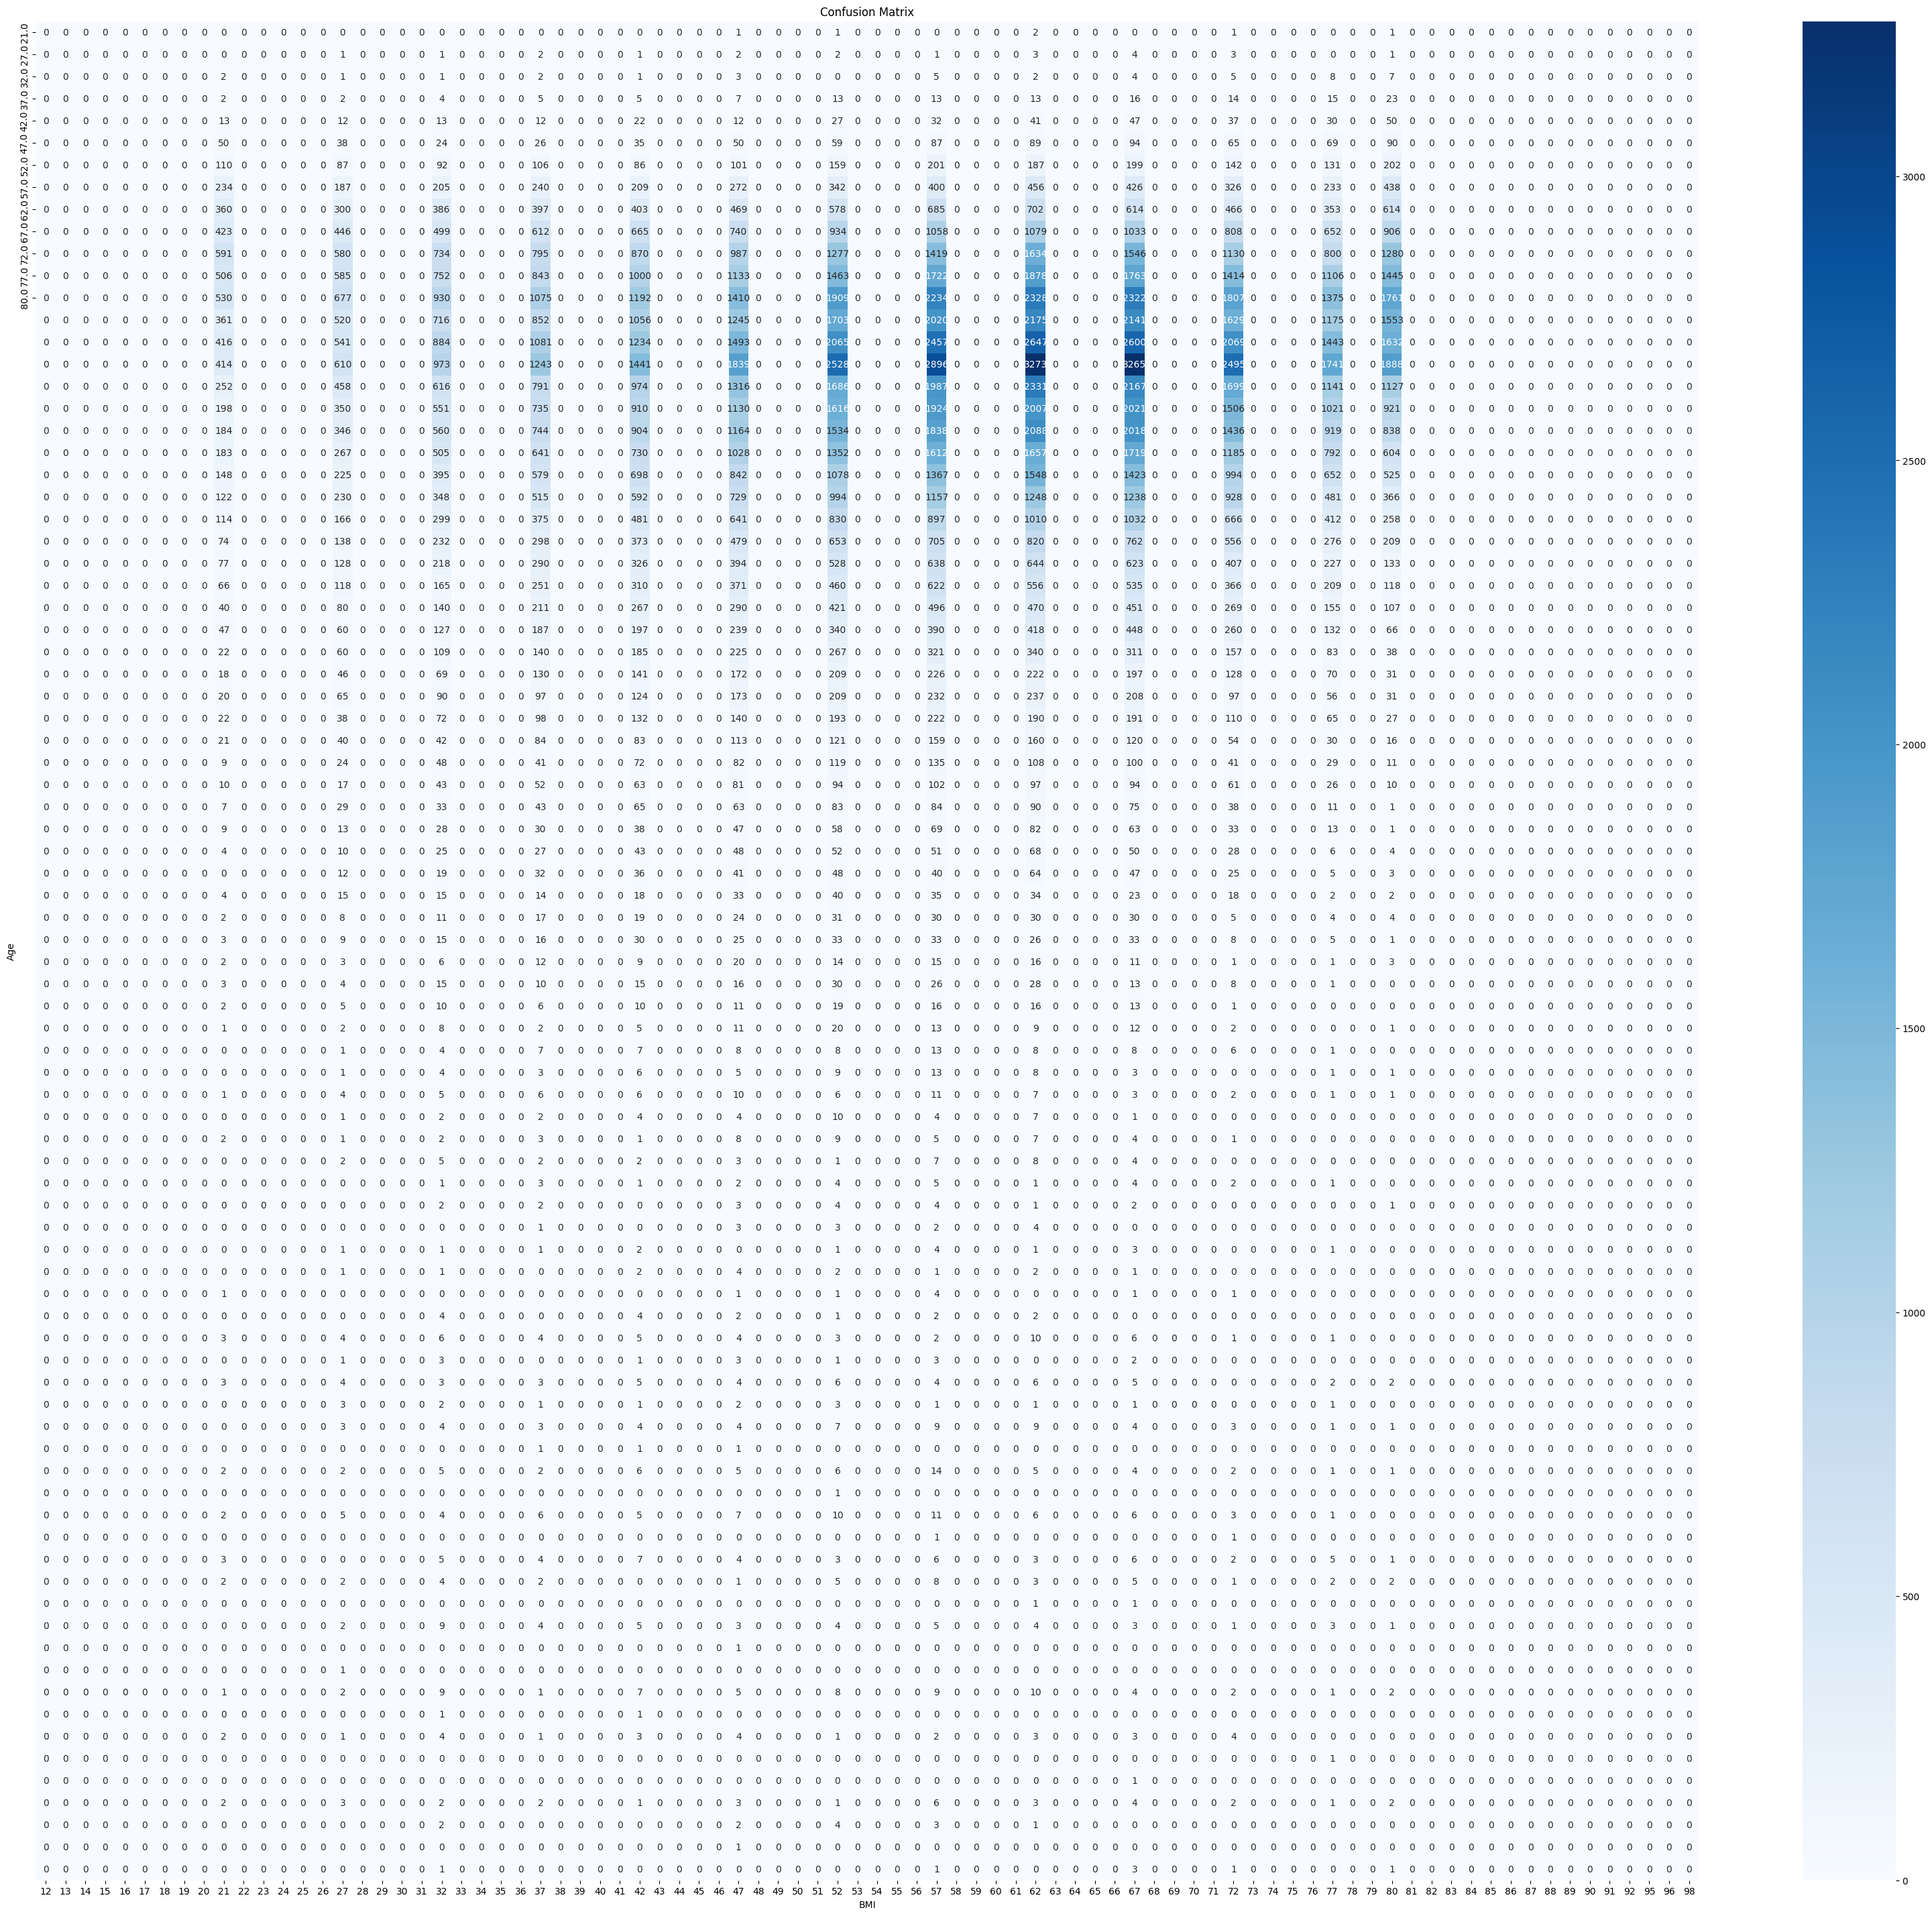

In [ ]:
x = data['BMI']
y = data['midpoint']
cm = confusion_matrix(x, y)
plt.figure(figsize=(40, 36))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(x), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

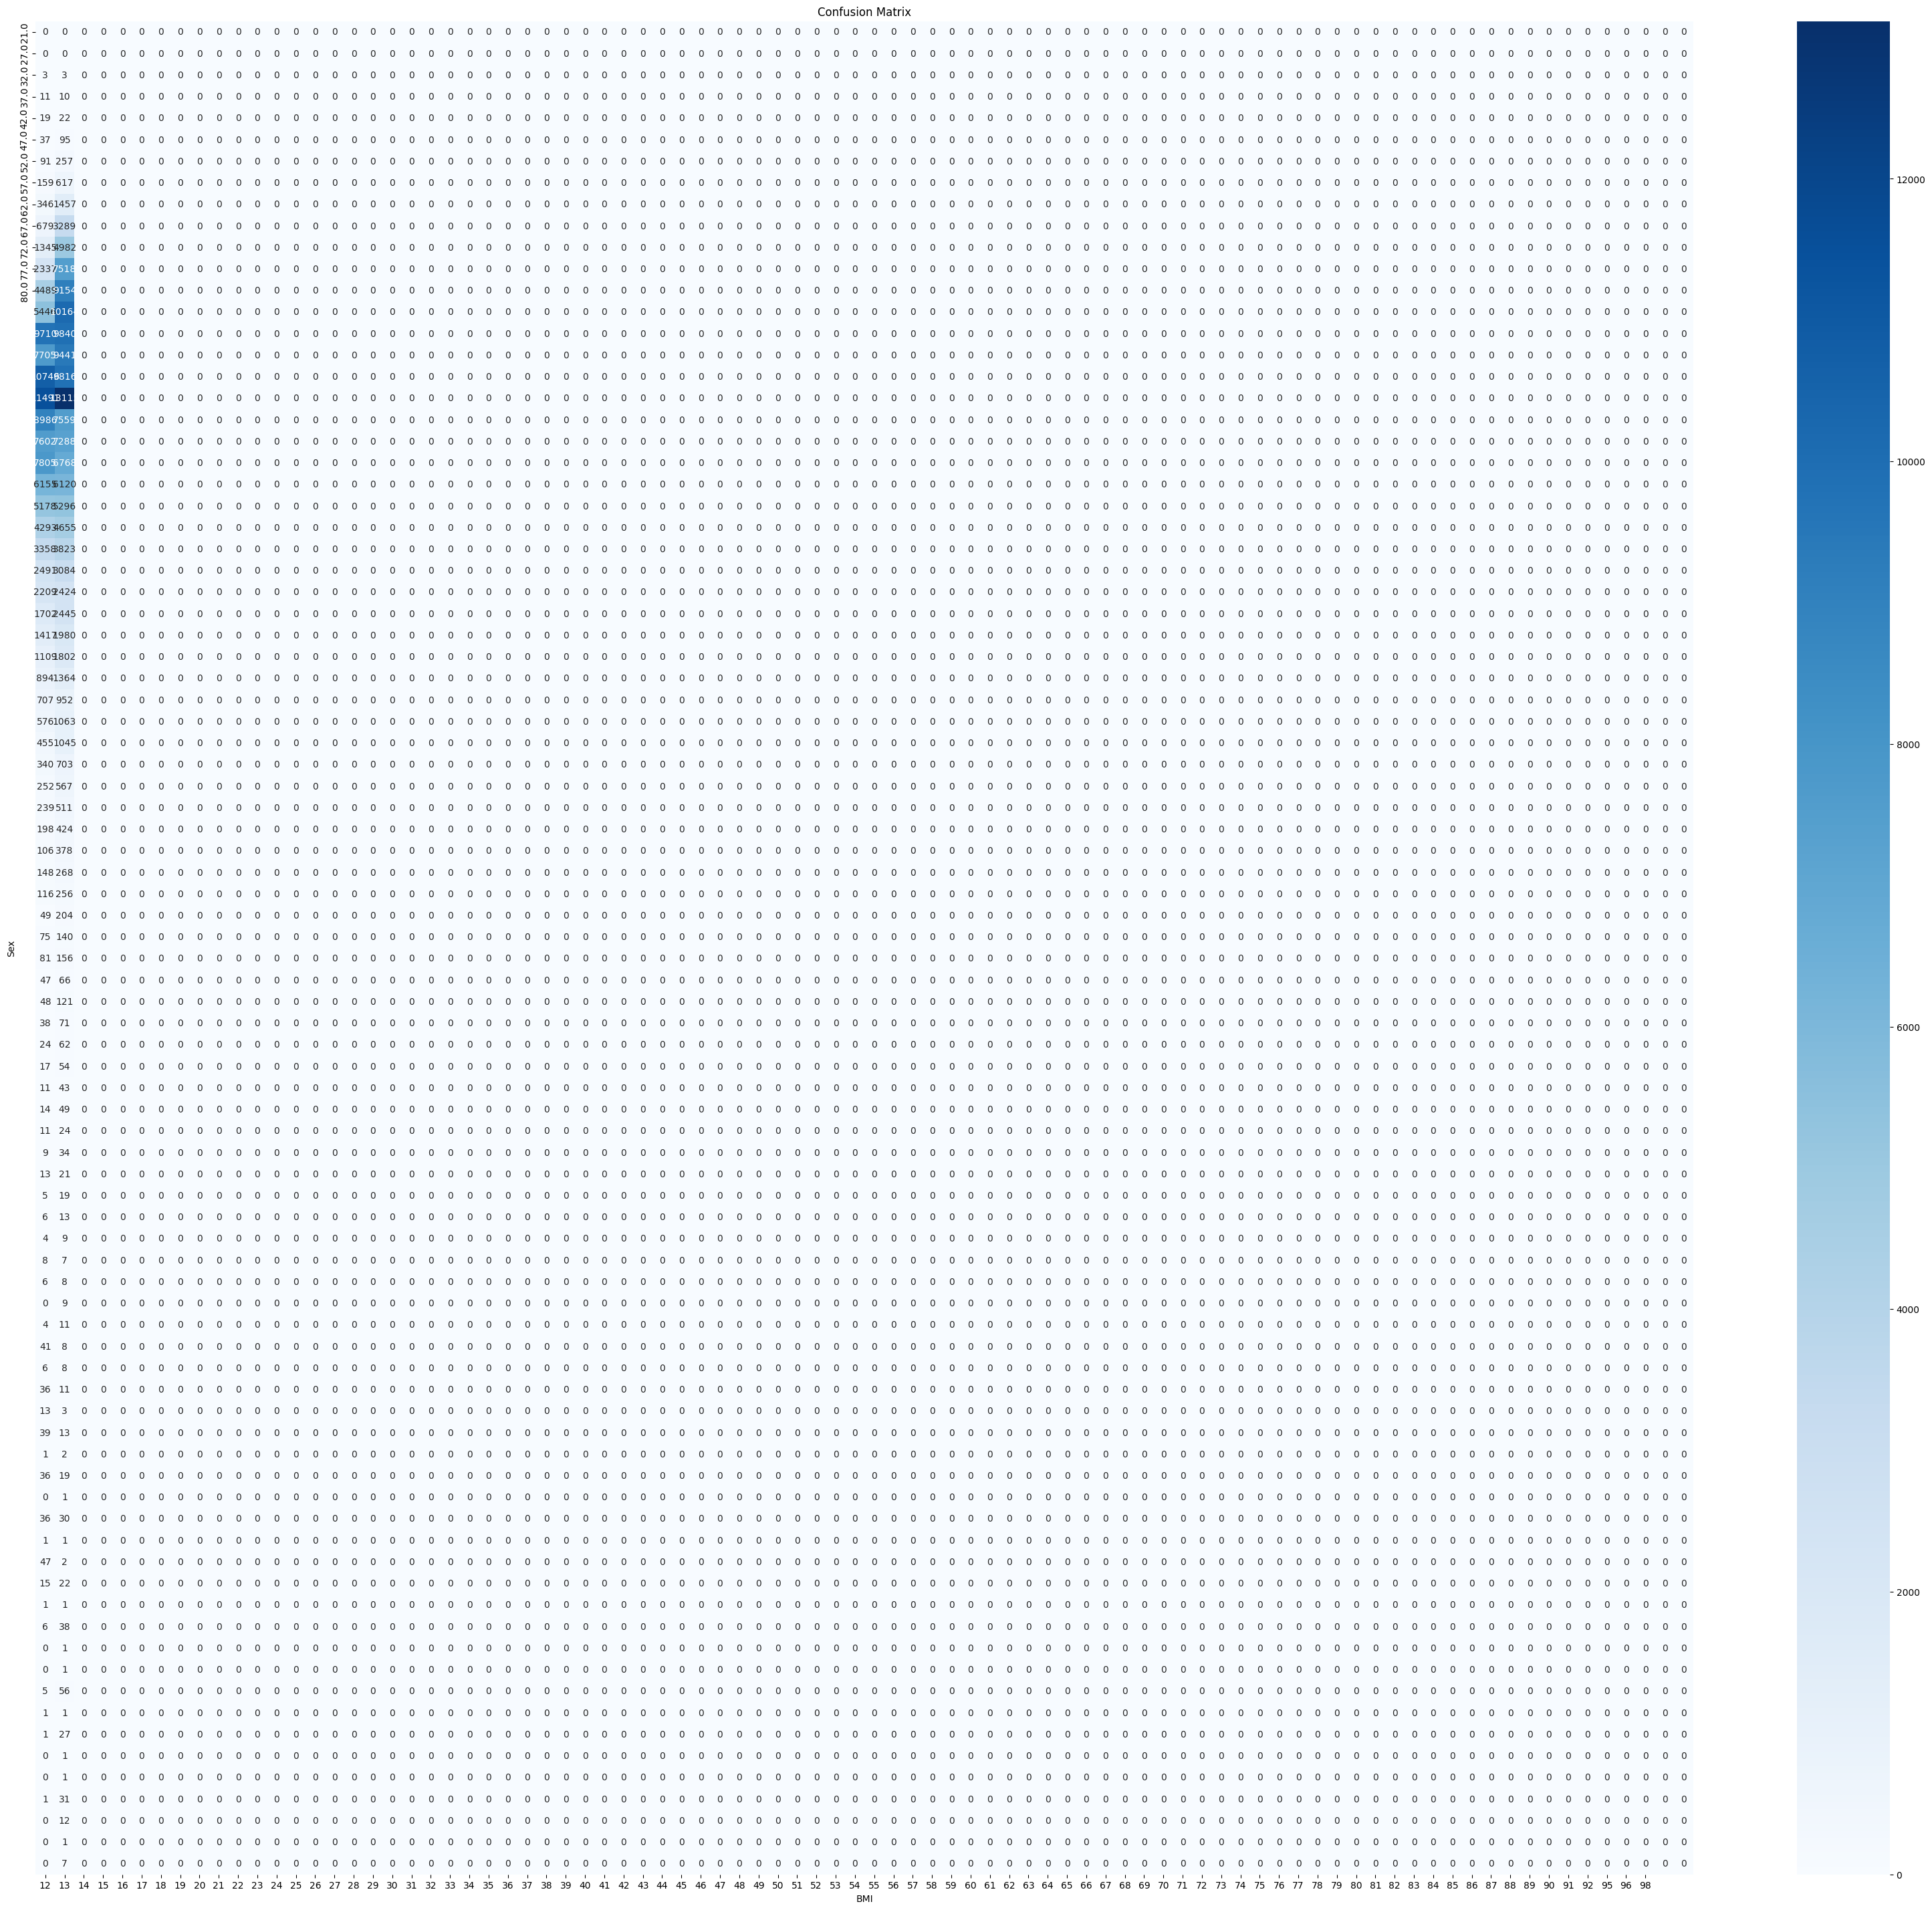

In [ ]:
a = data['BMI']
b = data['sex_numeric']
cm = confusion_matrix(a, b)
plt.figure(figsize=(40, 36))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(x), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('BMI')
plt.ylabel('Sex')
plt.show()

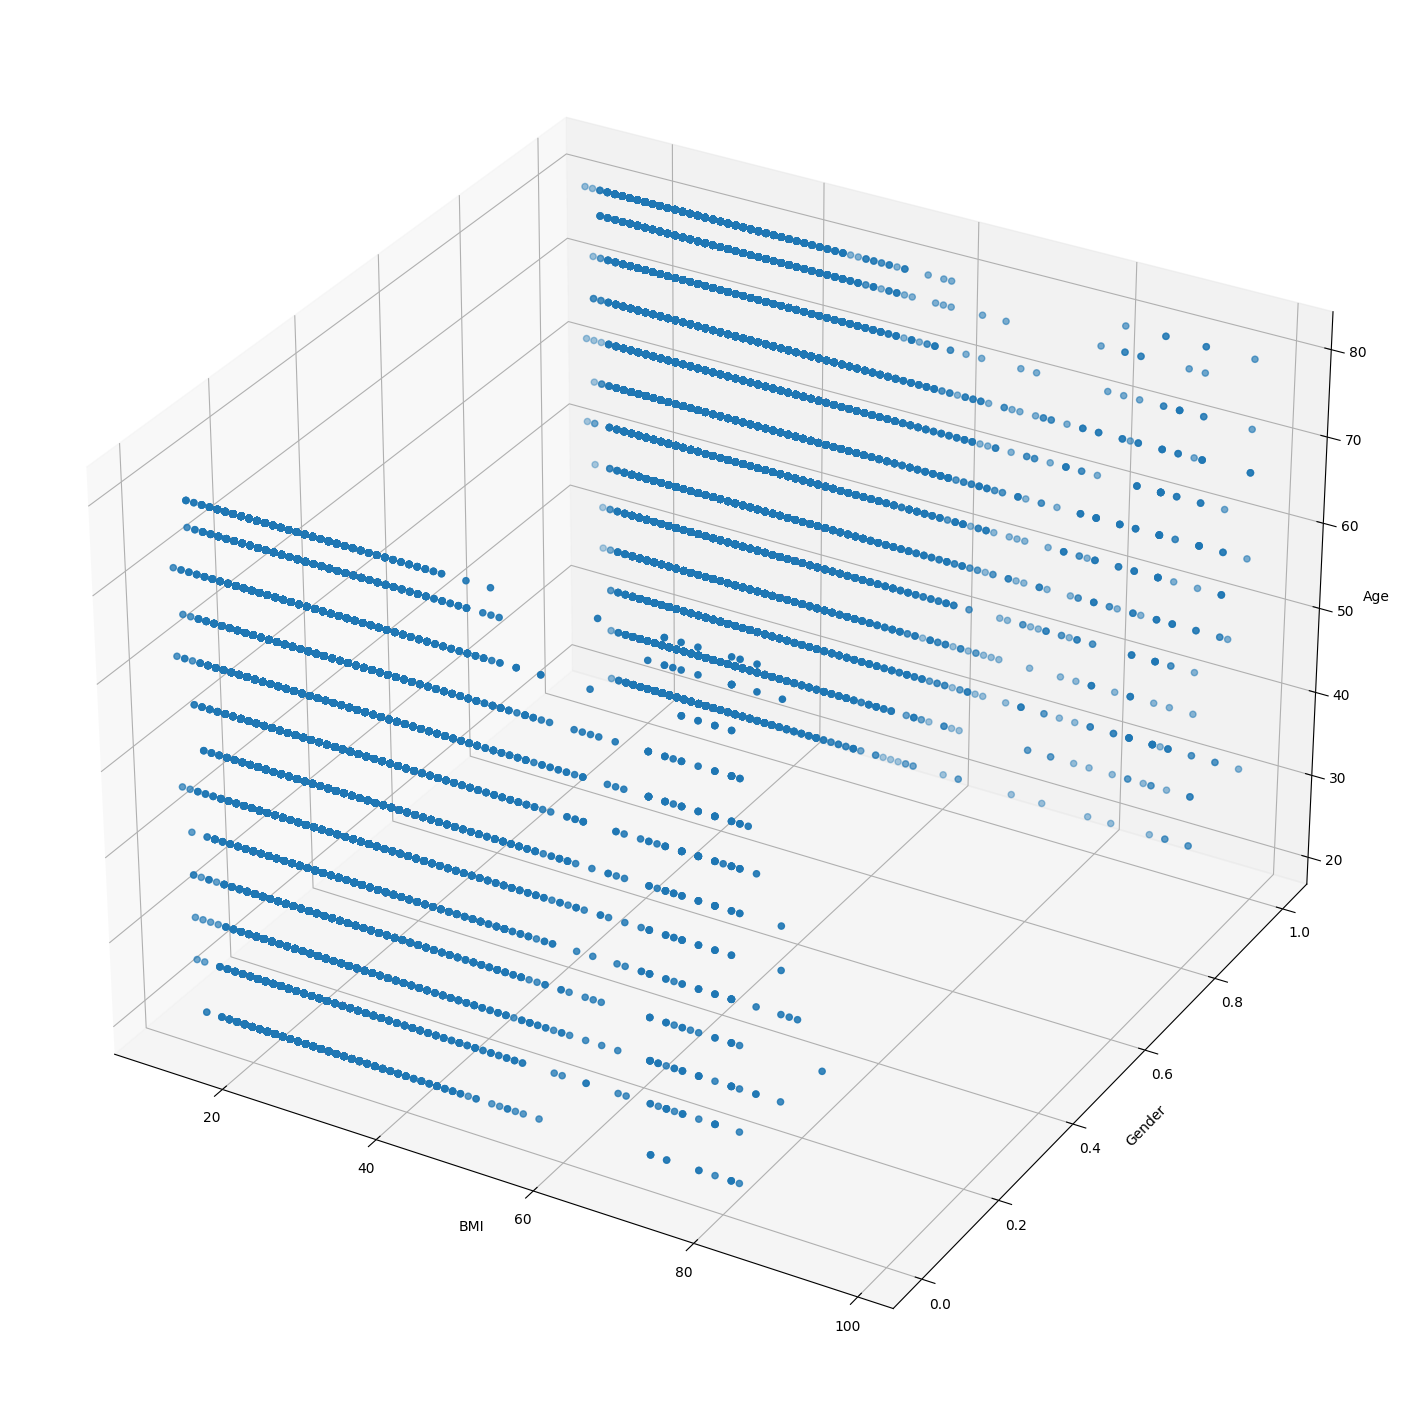

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data
x = data['BMI']
y = data['sex_numeric']
z = data['midpoint']

# Create 3D scatter plot
#fig = plt.figure()
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('BMI')
ax.set_ylabel('Gender')
ax.set_zlabel('Age')

plt.show()
